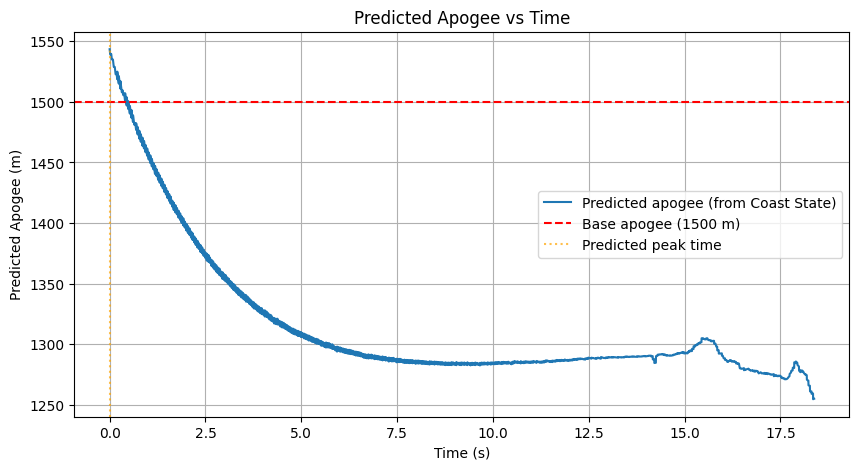

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(
    "pelicanator_launch_4.csv",
    dtype={
        "timestamp": "float64",
        "current_altitude": "float64",
        "vertical_velocity": "float64",
        "state_letter": "string"
    },
    low_memory=False
)

# Keep only coast phase data (state_letter == 'C')
df_c = df[df["state_letter"] == "C"]

# Keep only valid rows
df_clean = df_c[["timestamp", "current_altitude", "vertical_velocity", "vertical_acceleration"]].dropna()

# Convert timestamps to seconds from start
t_ns = df_clean["timestamp"].to_numpy()
t = (t_ns - t_ns[0]) / 1e9



# Extract altitude and velocity
alt = df_clean["current_altitude"].to_numpy()
vel = df_clean["vertical_velocity"].to_numpy()

# Constants
g = 9.81
base_apogee = 1500.0  # meters

# Predict apogee using physics model
predicted_apogee = alt + vel**2 / (2 * g)

# Compute final predicted apogee and deviation from base apogee
idx_pred = np.argmax(predicted_apogee)
predicted_peak = predicted_apogee[idx_pred]
time_pred = t[idx_pred]

# Plot predicted apogee progression
plt.figure(figsize=(10,5))
plt.plot(t, predicted_apogee, label="Predicted apogee (from Coast State)")
plt.axhline(base_apogee, color="red", linestyle="--", label="Base apogee (1500 m)")
plt.axvline(time_pred, color="orange", linestyle=":", alpha=0.7, label="Predicted peak time")
plt.xlabel("Time (s)")
plt.ylabel("Predicted Apogee (m)")
plt.title("Predicted Apogee vs Time")
plt.legend()
plt.grid(True)
plt.show()



In [6]:
acc_drag = df_clean["vertical_acceleration"].to_numpy()
K_values = -acc_drag / (vel**2)
K_median = np.median(K_values)
print(f"Estimated drag constant K (median) ≈ {K_median:.6e}")

Estimated drag constant K (median) ≈ 2.523348e-04


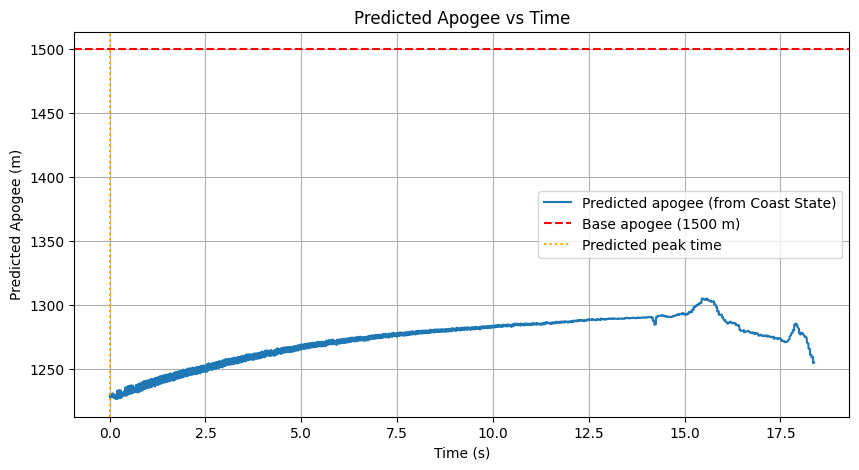

In [11]:
predicted_apogee_drag = alt + (1 / (2 * K_median)) * np.log(1 + (K_median * vel**2) / g)

plt.figure(figsize=(10,5))
plt.plot(t, predicted_apogee_drag, label="Predicted apogee (from Coast State)")
plt.axhline(base_apogee, color="red", linestyle="--", label="Base apogee (1500 m)")
plt.axvline(time_pred, color="orange", linestyle=":", label="Predicted peak time")
plt.xlabel("Time (s)")
plt.ylabel("Predicted Apogee (m)")
plt.title("Predicted Apogee vs Time")
plt.legend()
plt.grid(True)
plt.show()